In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
from obspy.signal.filter import lowpass
from obspy.signal.invsim import cosine_taper
from matplotlib.mlab import detrend
from wf_fft import wf_fft
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 1

# Adaptation of CAN_response.m by Carl Tape
# Coding by: Yongki Aiman, Tomy Gunawan, Angel Ling
# The example waveform is from CAN (Canberra, Australia) for the 2004 Mw 9.X Sumatra-Andaman earthquake.

# wf_fft is a homebrewed function.
# It MUST be in your working directory

# Run this cell before the beginning of each session

In [2]:
# Retrieve the waveform

client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:58:53.0")
starttime = t-(12*3600) # half day before the earthquake
endtime = t+(9*24*3600) # 9 days after the earthquake

st = client.get_waveforms("G", "CAN", "*", "LHZ", starttime, endtime, attach_response=True)
print(st)

1 Trace(s) in Stream:
G.CAN..LHZ | 2004-12-25T12:58:53.655900Z - 2005-01-04T00:58:51.655900Z | 1.0 Hz, 820799 samples


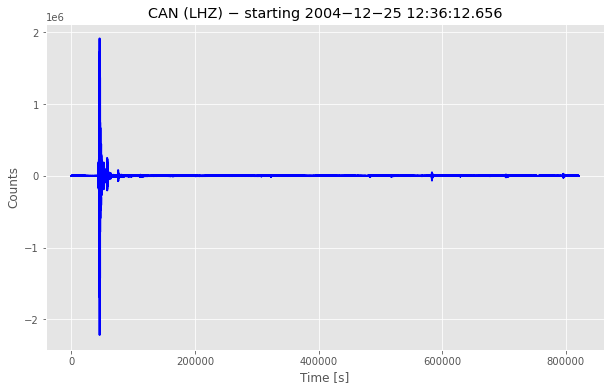

In [3]:
# take a copy of the stream to avoid overwriting the original data
can = st.copy()

# Choosing the 1st stream, Specify sampling parameters and Nyquist frequency
npts = can[0].stats.npts              # number of samples
df = can[0].stats.sampling_rate       # sampling rate
nsec = npts/df                        # sampling time
fNy = df / 2.0                        # Nyquist frequency
time = np.linspace(0,nsec,int(nsec*df))  # time axis for plotting

y  = can[0].data                      # set up signal 

# Plot the result
# Plot in Time Domain
#freq = np.linspace(0, fNy, len(y_fnew))         # Frequency axis for plotting
plt.plot(time, y, 'b', lw=2) 
plt.title('CAN (LHZ) − starting 2004−12−25 12:36:12.656')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.show()

In [9]:
# Compute FFT

# Demean signal
y_demean = detrend(y,'constant')

# Taper signal
taper_percentage = 1
taper = cosine_taper(npts,taper_percentage)
y_taper = y_demean * taper

# Calculate FFT

fft_amp, fft_phase, f = wf_fft(y_taper,fNy) # amplitude and phase of C(w), and frequencies

C = fft_amp*np.exp(1j*fft_phase) # Fourier Transform C(w)


In [ ]:
# Homework exercises start here!

